# Analysis of Resource Ratios

In [1]:
from __future__ import annotations

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

import json
from typing import List

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [2]:
results_filename = "../data/resource_ratio_paper_t40_s8_dt07-08_03-09-58.json"

with open(results_filename) as file:
    results_data = json.load(file)

## Resource Ratio results

In [3]:
greedy_name = 'Greedy Utility * deadline / Sum, Product, Pow percent sum'
algorithms = [('Greedy', greedy_name), ('Optimal', 'Optimal'), ('Fixed Optimal', 'Fixed Optimal')]
ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

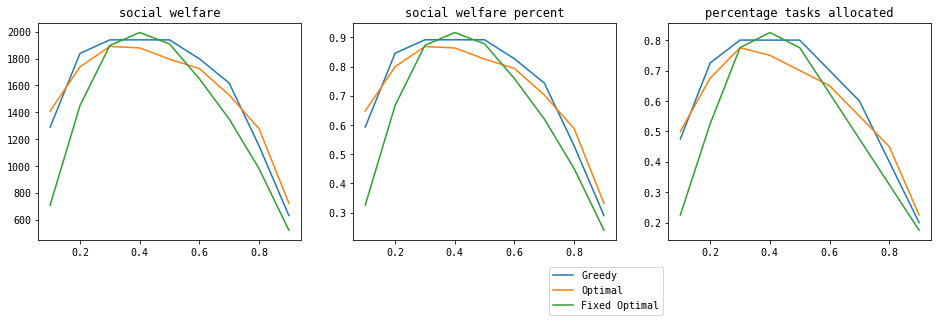

In [4]:
system_fig, (sw_ax, swp_ax, pta_ax) = plt.subplots(1, 3, figsize=(16, 4))
for ax, prop in [(sw_ax, 'social welfare'), (swp_ax, 'social welfare percent'), (pta_ax, 'percentage tasks allocated')]:
    for name, algo in algorithms:
        results = [results_data[0][f'ratio {ratio}'][algo][prop] for ratio in ratios]
        ax.plot(ratios, results, label=name)
    ax.set_title(prop)
        
plt.legend(bbox_to_anchor=(0, -0.1))

Save file location: figs/resource_ratio/eps/server_resource_usage.eps


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: figs/resource_ratio/png/server_resource_usage.png
Save file location: figs/resource_ratio/pdf/server_resource_usage.pdf


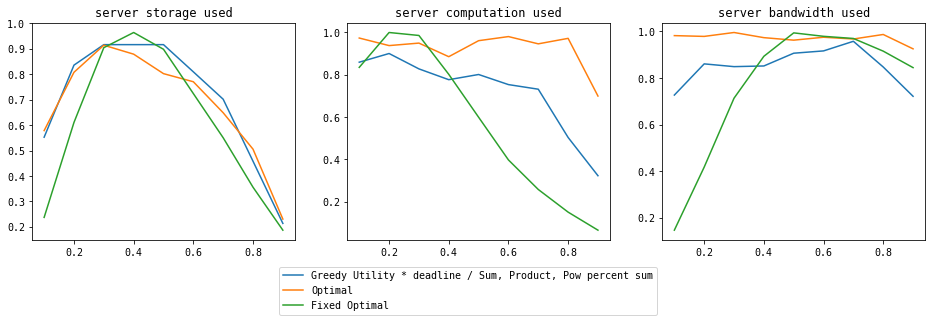

In [5]:
server_fig, (ax_storage_used, ax_computation_used, ax_bandwidth_used) = plt.subplots(1, 3, figsize=(16, 4))
for ax, prop in [(ax_storage_used, 'server storage used'), (ax_computation_used, 'server computation used'), 
                 (ax_bandwidth_used, 'server bandwidth used')]:
    for name, algo in algorithms:
        results = [np.mean(list(results_data[0][f'ratio {ratio}'][algo][prop].values())) for ratio in ratios]
        ax.plot(ratios, results, label=algo)
    ax.set_title(prop)
        
plt.legend(bbox_to_anchor=(0, -0.1))
save_plot('server_resource_usage', 'resource_ratio')

## Resource ratio social welfare percentage average

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Save file location: figs/resource_ratio/eps/social_welfare_percentage.eps
Save file location: figs/resource_ratio/png/social_welfare_percentage.png
Save file location: figs/resource_ratio/pdf/social_welfare_percentage.pdf


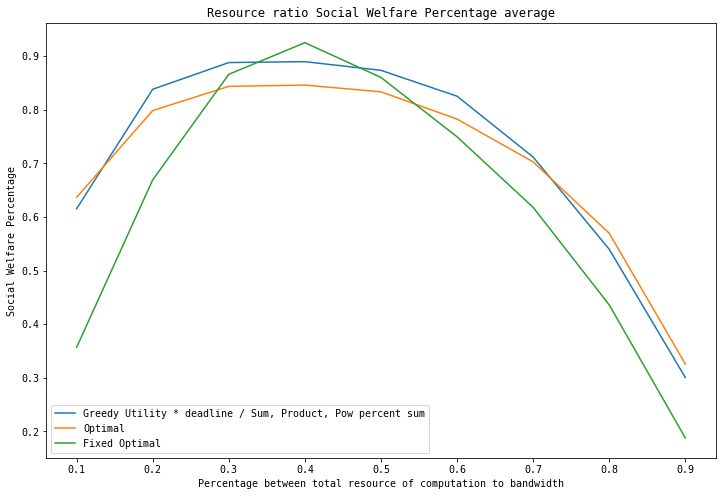

In [9]:
avg_fig, swp_avg_ax = plt.subplots(figsize=(12, 8))
swp_avg_ax.set_ylabel('Social Welfare Percentage')
swp_avg_ax.set_xlabel('Percentage between total resource of computation to bandwidth')
for name, algo in algorithms:
    swp_avg_ax.plot(ratios, [np.mean([result[f'ratio {ratio}'][algo]['social welfare percent'] 
                                      for result in results_data]) for ratio in ratios], label=algo)
swp_avg_ax.set_title('Resource ratio Social Welfare Percentage average')
plt.legend()
save_plot('social_welfare_percentage', 'resource_ratio')

## Resource ratio social welfare difference

Save file location: figs/resource_ratio/eps/social_welfare_difference.eps
Save file location: figs/resource_ratio/png/social_welfare_difference.png
Save file location: figs/resource_ratio/pdf/social_welfare_difference.pdf


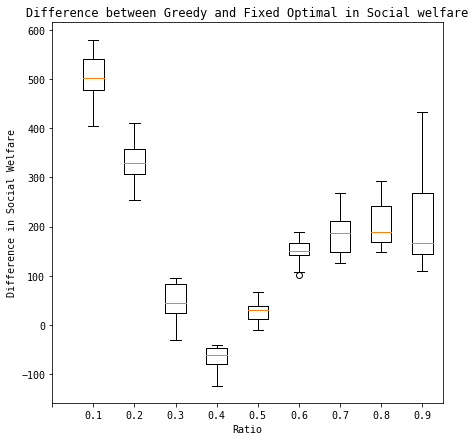

In [7]:
diff_fig, diff_ax = plt.subplots(figsize=(7, 7))

differences = [
    [result[f'ratio {ratio}'][greedy_name]['social welfare'] - result[f'ratio {ratio}']['Fixed Optimal']['social welfare']
     for result in results_data]
    for ratio in ratios
]

diff_ax.boxplot(differences)
diff_ax.set_ylabel('Difference in Social Welfare')
plt.xticks(ticks=np.arange(len(ratios)+1), labels=[''] + ratios)
diff_ax.set_xlabel('Ratio')
diff_ax.set_title('Difference between Greedy and Fixed Optimal in Social welfare')
save_plot('social_welfare_difference', 'resource_ratio')